# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# **Load Dataset 📥**

In [14]:
import os

# List all files in the dataset directory
data_path = "/kaggle/input/"
os.listdir(data_path)

# Load your dataset (update filename accordingly)
file_path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Select and Scale Relevant Features 🔍**

In [4]:
# Select required features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


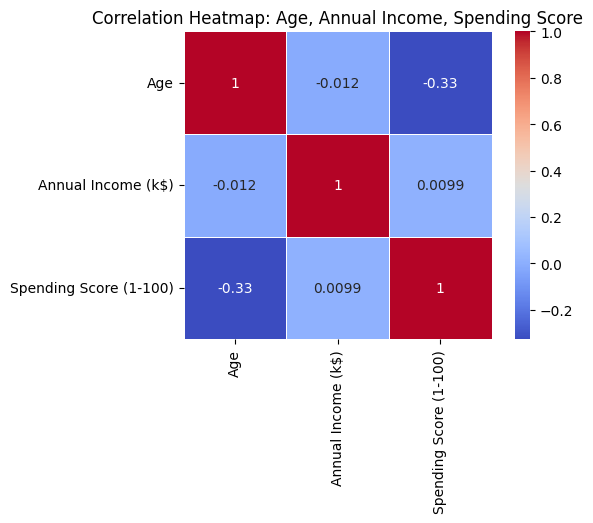

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Compute correlation matrix
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap: Age, Annual Income, Spending Score')
plt.show()


| Feature Pair                        | Correlation | Interpretation                                                                                  |
| ----------------------------------- | ----------- | ----------------------------------------------------------------------------------------------- |
| **Age vs Spending Score**           | **-0.33**   | Moderate negative correlation — as age increases, spending score tends to decrease.             |
| **Annual Income vs Spending Score** | **≈ 0.01**  | No significant correlation — income does **not** influence spending score much in this dataset. |
| **Age vs Annual Income**            | **≈ -0.01** | Practically no relationship — age and income are nearly uncorrelated.                           |


# **Find Optimal Number of Clusters (Elbow Method)**

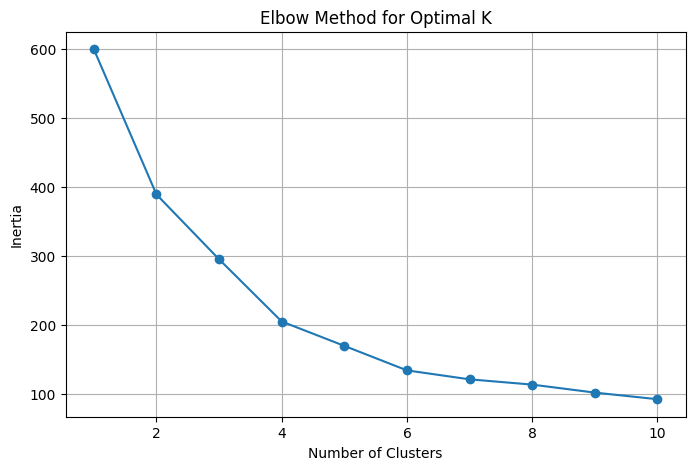

In [6]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


# **Apply K-Means Clustering**

In [7]:
# Let's say we choose 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df['Cluster'] = clusters


# **Evaluate K-Means**

In [8]:
print("Inertia:", kmeans.inertia_)


Inertia: 205.22514747675913


In [9]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.4039582785148566


# **Calculate Silhouette Scores for k = 2 to 10**

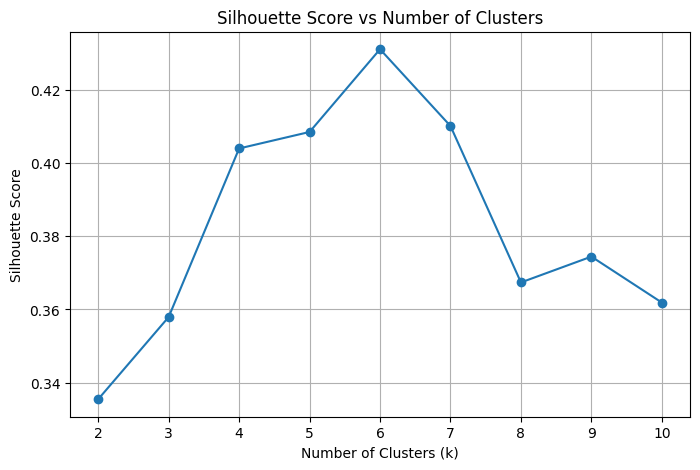

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette_score requires at least 2 clusters
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# **Silhouette Plot for a Chosen (k=4)**

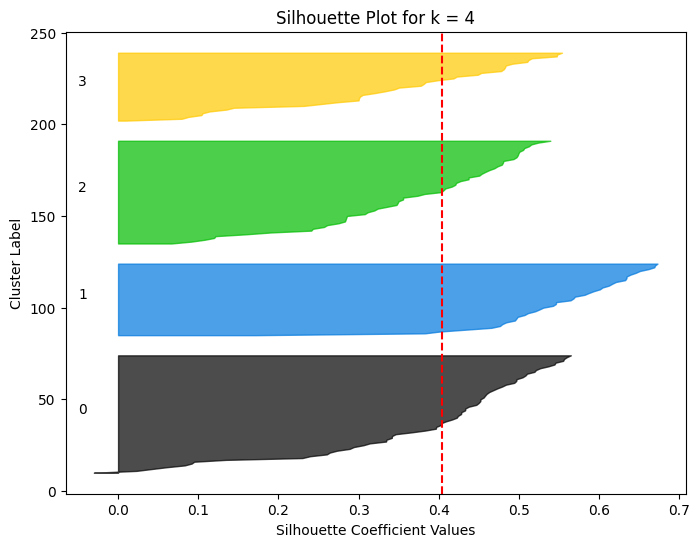

In [11]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Fit the model
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Silhouette values for each point
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
plt.figure(figsize=(8, 6))

for i in range(k):
    ith_cluster_silhouette = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette.sort()
    size_cluster_i = ith_cluster_silhouette.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.nipy_spectral(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title(f"Silhouette Plot for k = {k}")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.axvline(x=np.mean(sample_silhouette_values), color="red", linestyle="--")
plt.show()


# **Visualize Clusters (2D PCA)**

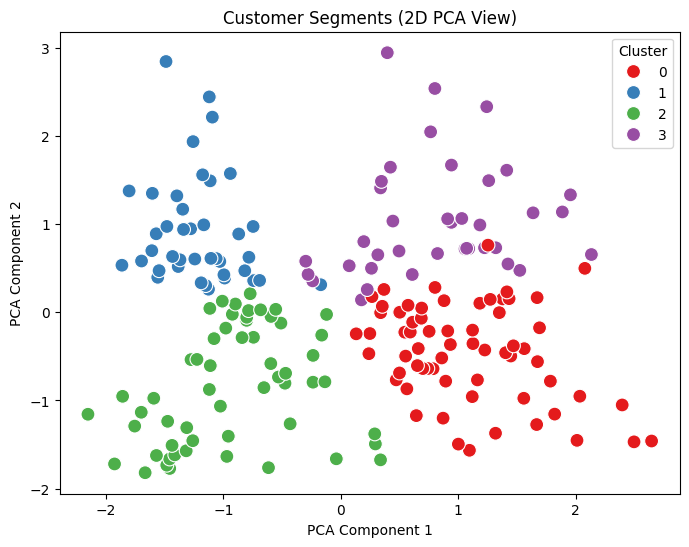

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments (2D PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


# **Describe Customer Groups**

In [13]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


# **📘 Project Explanation: Customer Segmentation Using K-Means**


# **🔍 Problem Statement**

In today’s competitive retail environment, understanding customer behavior is crucial. Businesses often deal with a wide variety of customers with different purchasing behaviors. This project uses unsupervised learning to divide customers into distinct segments based on their:

Age

Annual Income

Spending Score

By identifying patterns in this data, companies can target the right customers with personalized marketing strategies.

# **🧠 Why K-Means Clustering?**

K-Means is an unsupervised machine learning algorithm used for clustering.

It groups data points into k clusters such that each point belongs to the cluster with the nearest mean.

It’s widely used in customer segmentation, image compression, and market analysis.

# **🗃️ Dataset Overview**

Dataset: Mall_Customers.csv from Kaggle

Total Records: 200 customers

# **Key Features Used:**

Age

Annual Income (k$)

Spending Score (1–100)

No labels (unsupervised task)

# **⚙️ Project Workflow**

**1. Data Preprocessing**

Loaded data and selected only numerical features.

Applied StandardScaler to normalize the data so that all features contribute equally.

**2. Correlation Heatmap**

A heatmap showed that:

Age has a negative relationship with spending.

Income and spending score are almost uncorrelated.

This helped us understand feature relationships before clustering.

**3. Choosing the Right Number of Clusters**

Used the Elbow Method to find the optimal number of clusters (k) by plotting inertia (within-cluster variance).

Result: Elbow was visible at k = 4.

**4. Evaluating Cluster Quality**

Calculated the Silhouette Score for values of k = 2 to 10.

The best silhouette score was also observed at k = 4, supporting the elbow method.

**5. Clustering with K-Means**

Applied K-Means with k=4.

Each customer was assigned to a cluster.

This gave us 4 different customer segments.

**6. PCA for 2D Visualization**

Used Principal Component Analysis (PCA) to reduce data to 2 dimensions.

Visualized the clusters with different colors.

Helped understand how separate the groups really are.

**7. Cluster Profiling**

Calculated the mean Age, Income, and Spending Score for each cluster.

Each group was interpreted as a distinct customer type.

# **📊 Cluster Insights**

Cluster	Description
Cluster 0	Young & High Spenders – Ideal target for promotions
Cluster 1	Older & Low Spenders – Conservative buyers
Cluster 2	Average Income & Spending – General customers
Cluster 3	Young with Low Income but High Spending – Impulsive buyers

# **✅ What I Learned**

| Concept               | Description                                        |
| --------------------- | -------------------------------------------------- |
| Unsupervised Learning | No labeled outputs; model discovers patterns       |
| K-Means               | Clustered data based on distance to centroids      |
| Elbow Method          | Helped choose the best number of clusters          |
| Silhouette Score      | Measured how well-separated clusters are           |
| PCA                   | Reduced high-dimensional data for 2D visualization |

# **🏁 Conclusion**

This project successfully demonstrated how unsupervised learning can be used to identify customer segments in retail. With K-Means, we discovered hidden patterns that allow businesses to better understand and serve their customers.

This approach can be scaled for larger datasets and extended by adding more features such as:

Purchase history

Gender

Location